# Lesson 13 activity: probability distributions

## Learning objectives

This activity will help you to:

1. Understand and apply binomial distributions to model discrete events
2. Demonstrate the Central Limit Theorem through sampling distributions
3. Visualize theoretical and empirical probability distributions
4. Connect statistical theory to real-world data analysis

## Setup

Import the required libraries and load the weather dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scipy
from scipy.stats import binom

In [10]:
# Load the weather dataset
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df_weather = pd.read_csv(url)
df_weather.head()

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


## Exercise 1: binomial distribution - modeling rainy days

**Objective**: Understand and visualize binomial distributions using real weather data.

The binomial distribution models the number of successes in a fixed number of independent trials. In weather forecasting, we can use it to model the probability of rainy days over a period of time.

**Tasks**:

1. **Calculate the probability of rain**:
   - Count how many days in the dataset have `rainfall_inches > 0`
   - Calculate the proportion of rainy days (this is your probability `p`)
   - Print this probability with an interpretation (e.g., "Based on our data, there's a X% chance of rain on any given day")
   

2. **Create a theoretical binomial distribution**:
   - Assume you're looking at a 30-day period (like a month)
   - Using the probability from step 1, calculate the theoretical probability of getting exactly k rainy days for k = 0, 1, 2, ..., 30
   - Use `scipy.stats.binom.pmf()`

3. **Visualize the distribution**:
   - Create a bar plot showing the probability of each possible number of rainy days (0 to 30)
   - Add a vertical line showing the expected value (mean = n × p)
   - Label the axes appropriately
   - Include a title with the probability of rain

4. **Interpret** your findings:
   - What is the most likely number of rainy days in a 30-day period?
   - What is the expected (mean) number of rainy days?
   - What's the probability of having 15 or more rainy days in a month?
   - How does this distribution help weather forecasters make predictions?
   - **Bonus**: Calculate the standard deviation and explain what it tells you about the variability in monthly rainfall patterns

## Exercise 2: central limit theorem - sampling distribution of rainfall

**Objective**: Demonstrate the Central Limit Theorem by creating and analyzing a sampling distribution.

The Central Limit Theorem (CLT) states that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the population's original distribution. This is fundamental to statistical inference.

**Tasks**:

1. **Examine the population distribution**:
   - Create a histogram of all `rainfall_inches` values in the dataset
   - Calculate and print the population mean and standard deviation
   - Note the shape of this distribution (is it normal, skewed, etc.?)

2. **Create a sampling distribution**:
   - Take 1000 random samples from the rainfall data, each of size n=30
   - For each sample, calculate the mean rainfall
   - Store all 1000 sample means in a list or array
   - Hint: Use `df['rainfall_inches'].sample(n=30, replace=True)` for each sample

3. **Visualize the sampling distribution**:
   - Create a histogram of the 1000 sample means
   - Overlay a normal distribution curve using the theoretical mean (μ) and standard error (σ/√n)
   - Add a vertical line at the population mean
   - You can use `scipy.stats.norm.pdf()` to create the normal curve
   - Label axes and add a descriptive title

4. **Compare distributions**:
   - Create two side-by-side histograms:
     - Left: Original rainfall distribution (from step 1)
     - Right: Sampling distribution of means (from step 3)
   - Make sure both use the same y-axis scale for comparison
   - Include the mean and standard deviation in each subplot title

5. **Interpret** your findings:
   - How does the shape of the sampling distribution compare to the original distribution?
   - Is the sampling distribution approximately normal? (This demonstrates the CLT!)
   - Calculate the standard error: population σ divided by √30. How does this compare to the standard deviation of your sample means?
   - What does the CLT tell us about why we can use normal-based methods (like confidence intervals) even when our data isn't normally distributed?
   - **Bonus**: Repeat the experiment with different sample sizes (n=5, n=10, n=50). How does sample size affect the spread and normality of the sampling distribution?

### 1. Calculate the probability of rain ###

In [11]:
# Your code here# Count how many days in the dataset have `rainfall_inches > 0
number_of_days_in_sample = len(df_weather)
number_of_rainy_days = (df_weather['rainfall_inches'] > 0).sum()
rain_probability = round(number_of_rainy_days / number_of_days_in_sample, 5)

print(f'Number of Rainy Days {number_of_rainy_days}')
print(f'Based on our data, there is a {rain_probability}% chance of rain on any given day')

Number of Rainy Days 360
Based on our data, there is a 0.9863% chance of rain on any given day


### 2. Create a theoretical binomial distribution: ###

In [12]:
# Create binomial distribution

number_of_days = 30

# nd array of 1-30 days
k_values = np.arange(0, 31)

binomial_distribution = scipy.binom.pmf(k_values, number_of_days, rain_probability)
print('Binomial Distribution:')
print(binomial_distribution)

Binomial Distribution:
[1.26362152e-56 2.72914579e-53 2.84893935e-50 1.91429315e-47
 9.30252155e-45 3.48251098e-42 1.04464738e-39 2.57852524e-37
 5.33700613e-35 9.39217852e-33 1.41995342e-30 1.85865967e-28
 2.11865722e-26 2.11192415e-24 1.84623792e-22 1.41776698e-20
 9.56895692e-19 5.67325337e-17 2.94979267e-15 1.34124342e-13
 5.31078548e-12 1.82065614e-10 5.36211625e-09 1.34272428e-07
 2.81943513e-06 4.87148998e-05 6.74445616e-04 7.19335725e-03
 5.54859874e-02 2.75488695e-01 6.61105840e-01]


### Visualize the distribution ###

Probability of 15 or more rainy days: 1.000000
The standard deviation is: 0.636686


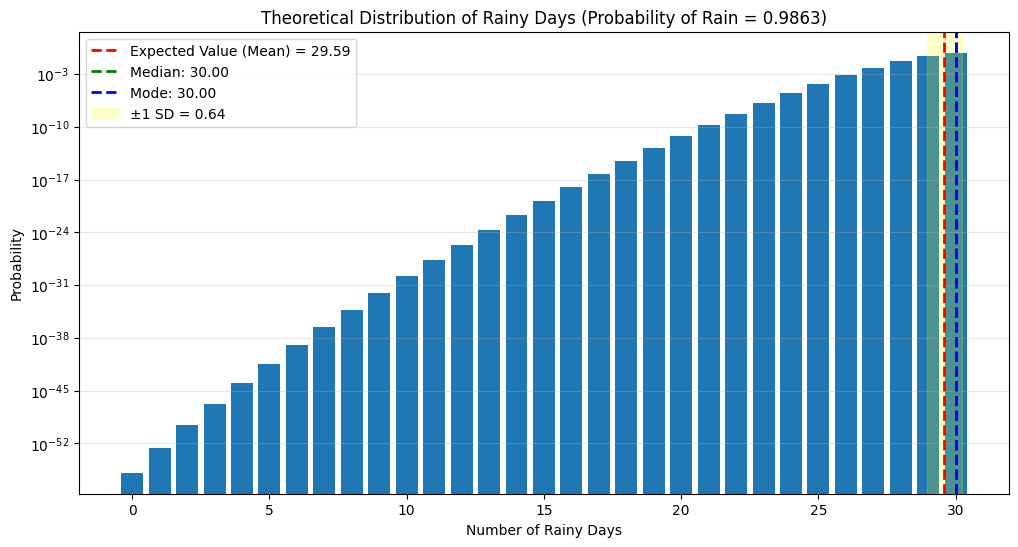

In [ ]:
# Calculate expected value (mean)
expected_value = number_of_days * rain_probability
mode_val = k_values[np.argmax(binomial_distribution)]  
median_val = binom.median(number_of_days, rain_probability)

# To find the likelyhood of 15 days of rain, index into the collection
# and some up 15 .. 30 probabilities
prob_15_or_more = np.sum(binomial_distribution[15:])
print(f"Probability of 15 or more rainy days: {prob_15_or_more:.6f}")

# Calculate the standard deviation
std_dev = binom.std(number_of_days, rain_probability)
print(f"The standard deviation is: {std_dev:.6f}")

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(k_values, binomial_distribution)

# Add vertical line for expected value
plt.axvline(expected_value, color='red', linestyle='--', linewidth=2, 
            label=f'Expected Value (Mean) = {expected_value:.2f}')

# Label axes
plt.xlabel('Number of Rainy Days')
plt.ylabel('Probability')
# Why would I use log on scale - non-linear on the y-axis
# Useful very large & small numbers Every increment is a scale of 10
# Default for log is log 10 matplotlib
plt.yscale('log')

# Title with probability of rain
plt.title(f'Theoretical Distribution of Rainy Days (Probability of Rain = {rain_probability})')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.2f}')

# Shade the area within 1 standard deviation
plt.axvspan(expected_value - std_dev, expected_value + std_dev, 
            alpha=0.2, color='yellow', 
            label=f'±1 SD = {std_dev:.2f}')

# Add legend and grid
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

### 4. Analysis ###
    What is the most likely number of rainy days in a 30-day period?
    The mode = 30

    What is the expected (mean) number of rainy days?
    The mean - 29.59

    What's the probability of having 15 or more rainy days in a month?
    1.0 or 100%

    How does this distribution help weather forecasters make predictions?
    On any given day there is a 98.63% chance of rain
    It'll give us information of expected raininess over the month

    **Bonus**: Calculate the standard deviation and explain what it tells you about the variability in monthly rainfall patterns
    The standard deviation is: 0.636686
    That is a small standard deviation. We can expect between 29 and 30 days of rainfall.
    On any given day, it's likely to rain

## Central Limit Theorem ##

#### Rainfall Histogram ####

                  count         mean        std    min      25%      50%  \
temperature_c     365.0     5.753425   7.720141  -10.0     0.70     5.70   
rainfall_inches   365.0     0.303699   0.311469    0.0     0.08     0.21   
humidity_percent  365.0    66.182740  18.232318   23.4    53.90    66.80   
pressure_hpa      365.0  1012.346301   7.437610  983.7  1007.50  1013.20   

                     75%      max  
temperature_c       10.7    25.00  
rainfall_inches      0.4     2.23  
humidity_percent    79.4   100.00  
pressure_hpa      1017.6  1039.00  
0.3036986301369863
Average Rainfall: 0.3037
Rainfall Standard Deviation: 0.31104


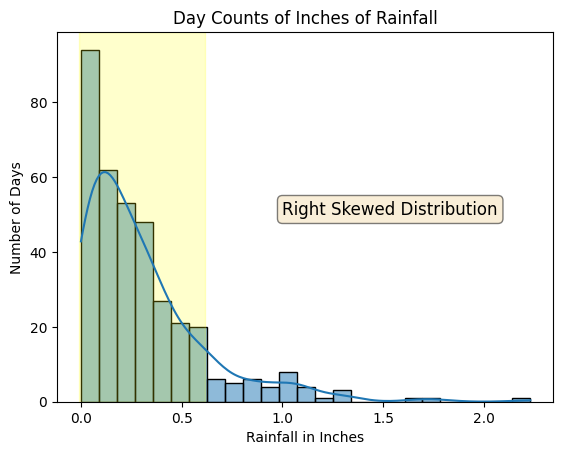

In [14]:
# plt.hist(df_weather['rainfall_inches'])
# sns.kdeplot(df_weather['rainfall_inches'], color='red', linewidth=2, label='KDE Curve')

sns.histplot(data=df_weather, x='rainfall_inches', kde=True)

print(df_weather.describe().T)

# Title and Label axes
plt.title(f'Day Counts of Inches of Rainfall')
plt.xlabel('Rainfall in Inches')
plt.ylabel('Number of Days')

# Calculate mean and standard deviation
average_rainfall = df_weather['rainfall_inches'].sum() / len(df_weather)
print(average_rainfall)
mean_rainfall = np.mean(df_weather['rainfall_inches']).round(5)
print(f'Average Rainfall: {mean_rainfall}')

std_rainfall = np.std(df_weather['rainfall_inches']).round(5)
print(f'Rainfall Standard Deviation: {std_rainfall}')

# Shade the area within 1 standard deviation
plt.axvspan(mean_rainfall - std_rainfall, mean_rainfall + std_rainfall, 
            alpha=0.2, color='yellow', 
            label=f'±1 SD = {std_dev:.2f}')

# Add text at specific x, y coordinates
plt.text(x=1, y=50, s='Right Skewed Distribution', fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

#### Random Sampling Distribution ###

Shape:(10000, 30)
Samples Type:<class 'numpy.ndarray'>
Samples Type:<class 'list'>
[11     0.12
20     0.05
149    0.19
220    0.09
354    0.49
278    0.25
49     0.45
246    0.07
363    0.07
238    0.18
356    0.01
23     0.07
262    0.01
21     0.48
125    0.39
91     0.00
345    0.34
163    0.62
19     0.18
296    0.15
277    0.46
33     0.31
24     0.03
32     0.16
252    0.61
45     0.19
321    0.01
263    0.80
2      0.01
193    0.12
Name: rainfall_inches, dtype: float64, 153    0.17
364    0.28
40     0.07
269    0.32
80     0.45
320    0.93
193    0.12
200    0.06
85     1.30
284    0.49
348    0.37
31     0.86
223    0.83
311    0.13
208    0.05
186    0.13
259    0.29
351    0.09
77     0.10
256    0.87
65     0.20
196    1.05
223    0.83
58     0.48
19     0.18
122    0.18
58     0.48
138    0.24
181    0.20
216    0.26
Name: rainfall_inches, dtype: float64, 362    0.08
138    0.24
134    0.06
332    0.20
359    0.28
288    0.51
47     0.06
316    0.28
262    0.01
316    0.2

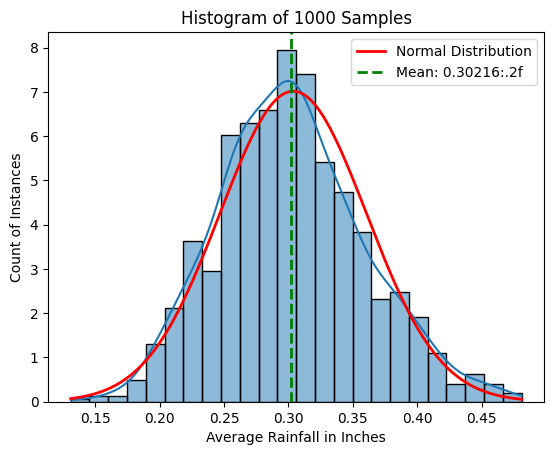

In [15]:
# Create Random Samples

# Create array of 1000 samples x sample size of 30
n_samples = 10000
sample_size = 30

samples = np.random.choice(df_weather['rainfall_inches'], 
                          size=(n_samples, sample_size), 
                          replace=True)

# Now samples is a 1000 x 30 array
print(f'Shape:{samples.shape}')  
print(f'Samples Type:{type(samples)}')  

# OR

samples = []
samples_means = []

for i in range(1000):
    # Create Sample
    sample = df_weather['rainfall_inches'].sample(n=sample_size, replace=True)

    # Create Sample Mean
    sample_mean = sample.mean()

    # Add to Collection
    samples.append(sample)
    samples_means.append(sample_mean)

print(f'Samples Type:{type(samples)}')  
print(samples)
print(samples_means)

population_mean = df_weather['rainfall_inches'].mean()
population_std = df_weather['rainfall_inches'].std()
standard_error = population_std / np.sqrt(sample_size)

# plt.hist(df_weather['rainfall_inches'])
# sns.kdeplot(df_weather['rainfall_inches'], color='red', linewidth=2, label='KDE Curve')

sns.histplot(data=samples_means, stat='density', kde=True)

# Create normal distribution curve
x_range = np.linspace(min(samples_means), max(samples_means), 1000)
normal_curve = scipy.norm.pdf(x_range, loc=population_mean, scale=standard_error)
plt.plot(x_range, normal_curve, color='red', linewidth=2, label='Normal Distribution')

# Title and Label axes
plt.title(f'Histogram of 1000 Samples')
plt.xlabel('Average Rainfall in Inches')
plt.ylabel('Count of Instances')

# # Calculate mean and standard deviation
# average_rainfall = df_weather['rainfall_inches'].sum() / len(df_weather)
# print(average_rainfall)
mean_rainfall = np.mean(samples).round(5)

# print(f'Average Rainfall: {mean_rainfall}')

#std_rainfall = np.std(samples).round(5)
# print(f'Rainfall Standard Deviation: {std_rainfall}')

plt.axvline(mean_rainfall, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_rainfall}:.2f')

# # Shade the area within 1 standard deviation
# plt.axvspan(mean_rainfall - std_rainfall, mean_rainfall + std_rainfall, 
#             alpha=0.2, color='yellow', 
#             label=f'±1 SD = {std_dev:.2f}')

# # Add text at specific x, y coordinates
# plt.text(x=1, y=50, s='Right Skewed Distribution', fontsize=12, 
#          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.legend()
plt.show()


### Compare Distributions ###

Rainfall std: 0.31104
Standard Error: 0.05678787476213562
Sample Means std: 0.056624664684805565


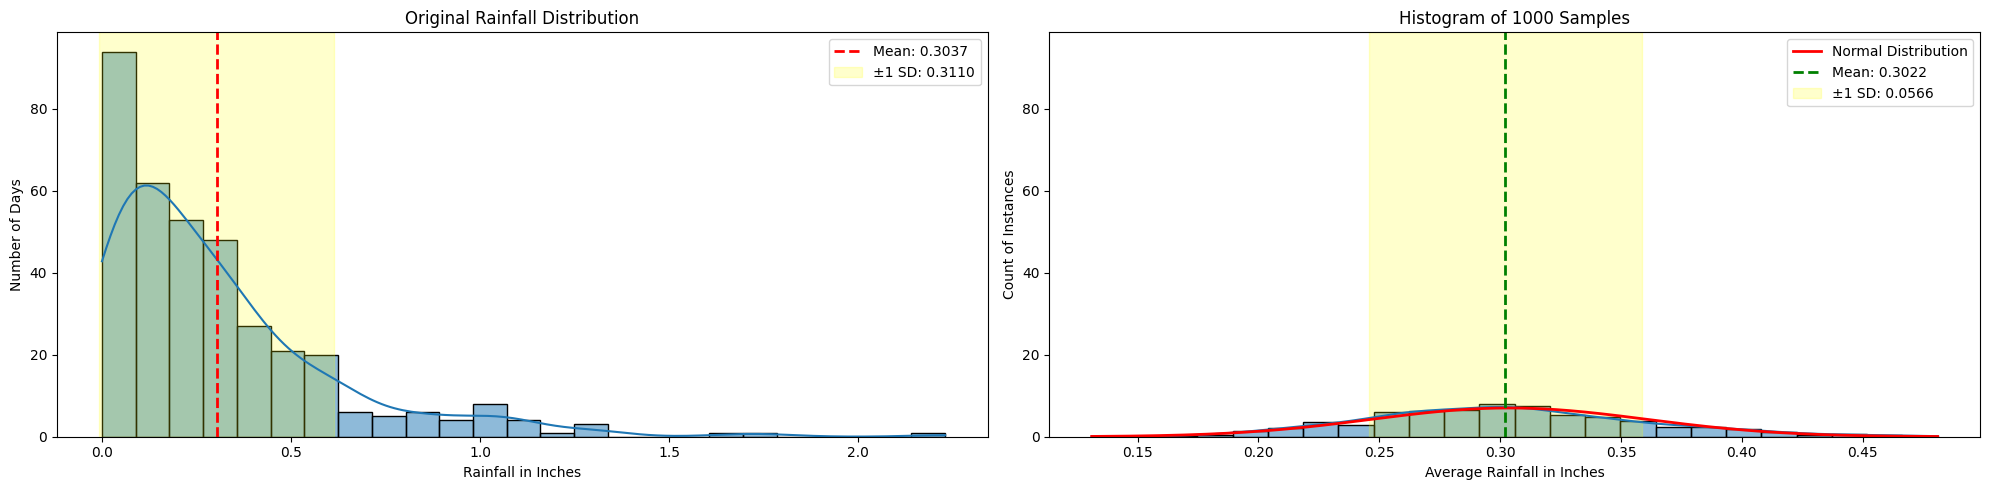

In [16]:
# Start out by dimensioning plots

# I need a 1X2 plot to display 2 histograms
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes = axes.flatten()

#
# Original Rainfall Distribution
#
sns.histplot(data=df_weather, x='rainfall_inches', ax=axes[0], kde=True)

# Title and Label axes
axes[0].set_title(f'Original Rainfall Distribution')
axes[0].set_xlabel('Rainfall in Inches')
axes[0].set_ylabel('Number of Days')

# Calculate mean and standard deviation
average_rainfall = df_weather['rainfall_inches'].sum() / len(df_weather)
mean_rainfall = np.mean(df_weather['rainfall_inches']).round(5)
std_rainfall = np.std(df_weather['rainfall_inches']).round(5)

# Plot mean and std
# Calculate mean and standard deviation for original data
# Add mean line
axes[0].axvline(mean_rainfall, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_rainfall:.4f}')

# Shade the area within 1 standard deviation
axes[0].axvspan(mean_rainfall - std_rainfall, mean_rainfall + std_rainfall,
                alpha=0.2, color='yellow', 
                label=f'±1 SD: {std_rainfall:.4f}')

axes[0].legend()


#
# Sampling distribution of means
#
sns.histplot(data=samples_means, ax=axes[1], stat='density', kde=True)

# Create normal distribution curve
x_range = np.linspace(min(samples_means), max(samples_means), 1000)
normal_curve = scipy.norm.pdf(x_range, loc=population_mean, scale=standard_error)
axes[1].plot(x_range, normal_curve, color='red', linewidth=2, label='Normal Distribution')

# Title and Label axes
axes[1].set_title(f'Histogram of 1000 Samples')
axes[1].set_xlabel('Average Rainfall in Inches')
axes[1].set_ylabel('Count of Instances')

# # Calculate mean and standard deviation
# average_rainfall = df_weather['rainfall_inches'].sum() / len(df_weather)
# print(average_rainfall)
mean_rainfall = np.mean(samples).round(5)

# print(f'Average Rainfall: {mean_rainfall}')

#std_rainfall = np.std(samples).round(5)
# print(f'Rainfall Standard Deviation: {std_rainfall}')

# Calculate mean and standard deviation for sample means
mean_samples = np.mean(samples_means)
std_samples = np.std(samples_means)

standard_error = std_rainfall / np.sqrt(sample_size)
print(f'Rainfall std: {std_rainfall}')
print(f'Standard Error: {standard_error}')
print(f'Sample Means std: {std_samples}')

# Add mean line
axes[1].axvline(mean_samples, color='green', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_samples:.4f}')

# Shade the area within 1 standard deviation
axes[1].axvspan(mean_samples - std_samples, mean_samples + std_samples,
                alpha=0.2, color='yellow', 
                label=f'±1 SD: {std_samples:.4f}')

axes[1].legend()

# Both plots using same scale
ylim0 = axes[0].get_ylim()
ylim1 = axes[1].get_ylim()

max_y = max(ylim0[1], ylim1[1])

axes[0].set_ylim(0, max_y)
axes[1].set_ylim(0, max_y)

plt.tight_layout(h_pad=5)
plt.show() 

### Analysis ###

    How does the shape of the sampling distribution compare to the original distribution?
    The sampling distribution has a shallower, normalized curve

    Is the sampling distribution approximately normal? (This demonstrates the CLT!)
    Yes it is

    Calculate the standard error: population σ divided by √30. How does this compare to the standard deviation of your sample means?
    Rainfall std: 0.31104
    Standard Error: 0.05678787476213562
    Sample Means std: 0.056034352622099395

    Sample means standard deviation is much smaller. 
    Much less variation in Sample Means.

    What does the CLT tell us about why we can use normal-based methods (like confidence intervals) even when our data isn't normally distributed?
    Apply the random sampling we just applied to normaize the results.
    
    **Bonus**: Repeat the experiment with different sample sizes (n=5, n=10, n=50). How does sample size affect the spread and normality of the sampling distribution?